In [1]:
import json
import numpy as np
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

In [2]:
url = 'http://geo.stat.fi/geoserver/tilastointialueet/wfs?request=GetFeature&typename=tilastointialueet:kunta1000k&outputformat=JSON'
geodata = gpd.read_file(url)

In [3]:
geodata.head()

,id,kunta,vuosi,nimi,namn,name,geometry
0,kunta1000k.1,005,2021,Alajärvi,Alajärvi,Alajärvi,"POLYGON ((366787.924 7001300.583, 364150.540 7..."
1,kunta1000k.2,009,2021,Alavieska,Alavieska,Alavieska,"POLYGON ((382543.364 7120022.976, 380556.177 7..."
2,kunta1000k.3,010,2021,Alavus,Alavo,Alavus,"POLYGON ((343298.204 6961570.195, 340572.015 6..."
3,kunta1000k.4,016,2021,Asikkala,Asikkala,Asikkala,"POLYGON ((436139.680 6798279.085, 432732.949 6..."
4,kunta1000k.5,018,2021,Askola,Askola,Askola,"POLYGON ((426631.036 6720528.076, 425751.505 6..."


In [4]:
len(geodata)

309

In [5]:
geodata.crs

{'init': 'epsg:3067'}

In [6]:
geodata.rename(columns={'kunta': 'code'}, inplace=True)
geodata = geodata[['code', 'name', 'geometry']]
geodata.head()

,code,name,geometry
0,005,Alajärvi,"POLYGON ((366787.924 7001300.583, 364150.540 7..."
1,009,Alavieska,"POLYGON ((382543.364 7120022.976, 380556.177 7..."
2,010,Alavus,"POLYGON ((343298.204 6961570.195, 340572.015 6..."
3,016,Asikkala,"POLYGON ((436139.680 6798279.085, 432732.949 6..."
4,018,Askola,"POLYGON ((426631.036 6720528.076, 425751.505 6..."


<AxesSubplot:>

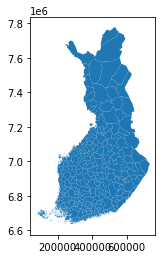

In [7]:
geodata.plot()

In [8]:
geodata.dtypes

code          object
name          object
geometry    geometry
dtype: object

In [14]:
data = pd.read_excel('L4_data/Shp_jaesenkunnat_2020.xls', sheet_name='kunnat_shp_2020_ aakkosjärj.', header=3)
data.head(10)

,kunta-\nkoodi,kunta,shp:n koodi,sairaanhoitopiiri,erva-alue,kuntien lkm
0,NaN,NaN,NaN,NaN,NaN,NaN
1,20.0,Akaa,6.0,Pirkanmaa,TAYS,1.0
2,5.0,Alajärvi,15.0,Etelä-Pohjanmaa,TAYS,2.0
3,9.0,Alavieska,18.0,Pohjois-Pohjanmaa,OYS,3.0
4,10.0,Alavus,15.0,Etelä-Pohjanmaa,TAYS,4.0
5,16.0,Asikkala,7.0,Päijät-Häme,HYKS,5.0
6,18.0,Askola,25.0,HUS,HYKS,6.0
7,19.0,Aura,3.0,Varsinais-Suomi,TYKS,7.0
8,46.0,Enonkoski,11.0,Itä-Savo,KYS,8.0
9,47.0,Enontekiö,21.0,Lappi,OYS,9.0


In [17]:
data.dropna(inplace=True)
print(len(data))
data.head()

294


,kunta-\nkoodi,kunta,shp:n koodi,sairaanhoitopiiri,erva-alue,kuntien lkm
1,20.0,Akaa,6.0,Pirkanmaa,TAYS,1.0
2,5.0,Alajärvi,15.0,Etelä-Pohjanmaa,TAYS,2.0
3,9.0,Alavieska,18.0,Pohjois-Pohjanmaa,OYS,3.0
4,10.0,Alavus,15.0,Etelä-Pohjanmaa,TAYS,4.0
5,16.0,Asikkala,7.0,Päijät-Häme,HYKS,5.0


In [18]:
data.rename(columns={'kunta-\nkoodi': 'code', 'sairaanhoitopiiri': 'healthcareDistrict'}, inplace=True)

In [19]:
data = data[['code', 'healthcareDistrict']]
data.head(10)

,code,healthcareDistrict
1,20.0,Pirkanmaa
2,5.0,Etelä-Pohjanmaa
3,9.0,Pohjois-Pohjanmaa
4,10.0,Etelä-Pohjanmaa
5,16.0,Päijät-Häme
6,18.0,HUS
7,19.0,Varsinais-Suomi
8,46.0,Itä-Savo
9,47.0,Lappi
10,49.0,HUS


In [20]:
data.dtypes

code                  float64
healthcareDistrict     object
dtype: object

In [24]:
number = data.at[1, 'code']


'020'

In [23]:
print('20'.zfill(3))

020


In [25]:
str(int(number)).zfill(3)

'020'

In [27]:
data['code'] = data['code'].astype(int).astype('str')
data['code'] = data['code'].str.zfill(3)
data.head()

,code,healthcareDistrict
1,020,Pirkanmaa
2,005,Etelä-Pohjanmaa
3,009,Pohjois-Pohjanmaa
4,010,Etelä-Pohjanmaa
5,016,Päijät-Häme


In [29]:
geodata = geodata.merge(data, on='code', how='left')
geodata

,code,name,geometry,healthcareDistrict
0,005,Alajärvi,"POLYGON ((366787.924 7001300.583, 364150.540 7...",Etelä-Pohjanmaa
1,009,Alavieska,"POLYGON ((382543.364 7120022.976, 380556.177 7...",Pohjois-Pohjanmaa
2,010,Alavus,"POLYGON ((343298.204 6961570.195, 340572.015 6...",Etelä-Pohjanmaa
3,016,Asikkala,"POLYGON ((436139.680 6798279.085, 432732.949 6...",Päijät-Häme
4,018,Askola,"POLYGON ((426631.036 6720528.076, 425751.505 6...",HUS
...,...,...,...,...
304,977,Ylivieska,"POLYGON ((398010.991 7110887.267, 392464.690 7...",Pohjois-Pohjanmaa
305,980,Ylöjärvi,"POLYGON ((313738.511 6896936.100, 311165.511 6...",Pirkanmaa
306,981,Ypäjä,"POLYGON ((297451.456 6756204.328, 291432.640 6...",Kanta-Häme
307,989,Ähtäri,"POLYGON ((348733.187 6959704.551, 347302.684 6...",Etelä-Pohjanmaa


In [31]:
geodata[geodata['healthcareDistrict'].isnull()].name

7          Brändö
8          Eckerö
15       Finström
17          Föglö
18           Geta
24     Hammarland
57         Jomala
111      Kumlinge
121         Kökar
134       Lemland
147    Lumparland
153     Mariehamn
236       Saltvik
254      Sottunga
256          Sund
301         Vårdö
Name: name, dtype: object

In [32]:
geodata.loc[geodata['healthcareDistrict'].isnull(), 'healthcareDistrict'] = 'Ahvenanmaa'

In [38]:
geodata.head()

,code,name,geometry,healthcareDistrict
0,005,Alajärvi,"POLYGON ((366787.924 7001300.583, 364150.540 7...",Etelä-Pohjanmaa
1,009,Alavieska,"POLYGON ((382543.364 7120022.976, 380556.177 7...",Pohjois-Pohjanmaa
2,010,Alavus,"POLYGON ((343298.204 6961570.195, 340572.015 6...",Etelä-Pohjanmaa
3,016,Asikkala,"POLYGON ((436139.680 6798279.085, 432732.949 6...",Päijät-Häme
4,018,Askola,"POLYGON ((426631.036 6720528.076, 425751.505 6...",HUS


In [40]:
geodata['healthcareDistrict'].value_counts()

Pohjois-Pohjanmaa    29
Varsinais-Suomi      28
HUS                  24
Pirkanmaa            23
Keski-Suomi          21
Pohjois-Savo         18
Etelä-Pohjanmaa      18
Ahvenanmaa           16
Satakunta            16
Lappi                15
Vaasa                13
Pohjois-Karjala      13
Päijät-Häme          12
Kanta-Häme           11
Keski-Pohjanmaa      10
Etelä-Savo            9
Etelä-Karjala         9
Kainuu                8
Kymenlaakso           6
Länsi-Pohja           6
Itä-Savo              4
Name: healthcareDistrict, dtype: int64

In [41]:
districts = geodata.dissolve(by='healthcareDistrict')

In [42]:
districts

,geometry,code,name
healthcareDistrict,,,
Ahvenanmaa,"MULTIPOLYGON (((173277.623 6640282.925, 173136...",035,Brändö
Etelä-Karjala,"POLYGON ((538858.650 6740202.117, 536909.932 6...",153,Imatra
Etelä-Pohjanmaa,"POLYGON ((373036.311 6953044.961, 376149.768 6...",005,Alajärvi
Etelä-Savo,"POLYGON ((562166.891 6843209.649, 563173.338 6...",097,Hirvensalmi
HUS,"MULTIPOLYGON (((272609.681 6632304.439, 272418...",018,Askola
Itä-Savo,"POLYGON ((603980.674 6824572.057, 600339.558 6...",046,Enonkoski
Kainuu,"POLYGON ((643098.600 7165870.100, 643537.000 7...",105,Hyrynsalmi
Kanta-Häme,"POLYGON ((369728.766 6728123.905, 366878.133 6...",061,Forssa
Keski-Pohjanmaa,"MULTIPOLYGON (((302835.219 7083897.220, 302801...",074,Halsua


In [44]:
districts.reset_index(inplace=True)

In [45]:
districts = districts[['healthcareDistrict', 'geometry']]
districts.head()

,healthcareDistrict,geometry
0,Ahvenanmaa,"MULTIPOLYGON (((173277.623 6640282.925, 173136..."
1,Etelä-Karjala,"POLYGON ((538858.650 6740202.117, 536909.932 6..."
2,Etelä-Pohjanmaa,"POLYGON ((373036.311 6953044.961, 376149.768 6..."
3,Etelä-Savo,"POLYGON ((562166.891 6843209.649, 563173.338 6..."
4,HUS,"MULTIPOLYGON (((272609.681 6632304.439, 272418..."


(40857.339215, 765862.479085, 6575077.820610001, 7833703.7515899995)

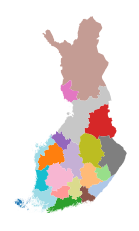

In [49]:
districts.plot(column='healthcareDistrict', cmap='tab20', k=21)
plt.axis('off')